### USER GENERATD CONTENT ANLAYTCS Group Homework 2

### Team members: Shayna Patel, Yunwei Yan, Zhuo Wen, Tanvi Modi, Vinay Locharulu, Vrinda Sharma 

In [ ]:
# -*- coding: utf-8 -*-
import tweepy
import csv
import pandas as pd
####input your credentials here
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
csvFile = open('ua7.csv', 'a')
csvWriter = csv.writer(csvFile)

hashtags=["#USElection2020","#Election2020","#Elections2020"]
hashtags_incomplete = ["#MAGA2020","#2020President","#2020poll", "#US2020","#2020Elections","#2020Election","#2020PresidentialElection","#2020_Presidential_Election","#USElection","#2020Presidential", "#PresentialElections","#2020USElections","#FederalElections","#UnitedStatesElections","#USAElections","#2020electionpoll" ]          
list1=[]          
df= pd.DataFrame()
vdf= pd.DataFrame()

list2=[]
list3=[]
list4 = []
count=0      
for i in hashtags_incomplete:
    print("Hashtag" + i)
    for tweet in tweepy.Cursor(api.search,q=i,count=3000,
                               lang="en",
                               since="2015-01-01").items():
        if (not tweet.retweeted) and ('RT @' not in tweet.text):
        
            count+=1
            print(i)
            print(count)
            print (tweet.user.location)
            if count >6000:
                break
            list1.append(tweet.created_at)
            list2.append(tweet.text)
            list3.append(tweet.user.location)
            list4.append(i)
                   
vdf['Date']= list1
vdf['tweets']= list2
vdf['User Location']= list3
vdf['hashtag']=list4
result_df1 = vdf.drop_duplicates(subset=['tweets'], keep='first')
vdf.to_csv('6ktweets.csv', encoding='utf-8')


In [1]:
import pandas as pd
from string import punctuation
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Part B

In [2]:
tweets = pd.read_csv('6ktweets.csv')

def remove_punctuation(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def conv_lowercase(x):
    return x.lower()

tweets['clean_tweets'] = tweets['tweets'].apply(remove_punctuation).apply(conv_lowercase)
#tweets

In [3]:
# nltk.download()
tweets['word_freq_list'] = tweets['clean_tweets'].apply(word_tokenize).apply(set).apply(list)

# Remove stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

tweets['word_freq_list'] = tweets['word_freq_list'].apply(remove_stopwords)

# Creating a list of all the words in the comments to count word frequency in the next step
count = []
for i in range(len(tweets)):
    count+=tweets['word_freq_list'][i]

In [4]:
# fetching the frequency of words
from nltk import FreqDist
word_freq = nltk.FreqDist(count)

In [5]:
#identified key issues

#trump issues
immigration = ['mexican', 'wall', 'immigrate', 'mexico', 'illegals', 'immigrants', 'immigrant']
impeach = ['impeachment', 'impeached', 'trumpimpeachment', 'impeachtrump']
foreign_relations = ['ukraine', 'isis', 'syria', 'china' ,'iran']

#biden issues
economy = ['job', 'jobs', 'money', 'taxes', 'taxpayer', 'economys', 'trumpeconomy']
education = [ 'college', 'school' ,'educate' ,'students' , 'student']
gun_control = ['control','weapons', 'weapon','guns', 'gun']

#replacements for trump and biden
trump = ['donaldtrump', 'realdonaldtrump',  'trump2020','trumps', 'donald' ]
biden = ['joebiden', 'joes','bidens', 'joe']

attributes = immigration + impeach+ foreign_relations + economy + trump + biden +education + gun_control

In [6]:
#replacing words with key issues
key_issues = pd.DataFrame()
key_issues['attribute'] = attributes
key_issues['general_attribute'] = ''

key_issues['general_attribute'][0:len(immigration)] = 'immigration'
key_issues['general_attribute'][len(immigration):len(immigration)+len(impeach)] = 'impeach'
key_issues['general_attribute'][len(immigration)+len(impeach):len(immigration)+len(impeach)+len(foreign_relations)] = 'foreign_relations'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)] = 'economy'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+ len(economy):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)] = 'trump'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+len(biden)] = 'biden'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+ len(biden):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+len(biden) + len(education)] = 'education'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+ len(biden)+ len(gun_control):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+len(biden) + len(education)+len(gun_control)] = 'gun_control'
#key_issues

In [7]:
def word_to_attributes(s):
    s = " ".join(str(x) for x in s)
    for i in key_issues.index.values:
        s = s.replace(key_issues["attribute"][i].lower(),key_issues["general_attribute"][i].lower())
    return s

tweets['comments_attributes_replace'] = tweets['word_freq_list'].apply(word_to_attributes)


# Part C

In [8]:
#making list of tweets that mention trump and list of tweets that mention biden
all_ = tweets['comments_attributes_replace'].apply(word_tokenize).apply(set).apply(list)
all_ = all_.tolist()
t =[]
b =[]
for i in all_: 
    for j in set(i):
        if j == 'trump':
            t.append(i)
        elif j == 'biden':
            b.append(i)             

In [9]:
#calculating total no of tweets that mention each of these key issues
economy =[]
immigration =[]
foreign_relations=[]
impeach=[]
for j in all_:
    for k in j:
        if k == 'economy':
            economy.append(j)
        if k == 'immigration':
            immigration.append(j)
        if k =='foreign_relations':
            foreign_relations.append(j)
        if k == 'impeach':
            impeach.append(j)     

In [10]:
economy_immigration =[]
economy_foreign=[]
economy_impeach=[]
for j in economy:
    for k in j:
        if k == 'immigration':
            economy_immigration.append(j)
        if k =='foreign_relations':
            economy_foreign.append(j)
        if k == 'impeach':
            economy_impeach.append(j)   
len(economy_impeach) 

2

In [11]:
foreign_immigration =[]
foreign_impeach=[]
for j in foreign_relations:
    for k in j:
        if k == 'immigration':
            foreign_immigration.append(j)
        if k == 'impeach':
            foreign_impeach.append(j)   
len(foreign_impeach) 


10

In [12]:
impeach_immigration =[]
for j in impeach:
    for k in j:
        if k == 'immigration':
            impeach_immigration.append(j)
len(impeach_immigration) 


0

In [13]:
#calculating total number of tweets that mention both key issues and trump
economy_trump =[]
immigration_trump =[]
foreign_relations_trump=[]
impeach_trump =[]
trump_biden =[]
for j in t:
    for k in j:
        if k == 'economy':
            economy_trump.append(j)
        if k == 'immigration':
            immigration_trump.append(j)
        if k =='foreign_relations':
            foreign_relations_trump.append(j)
        if k == 'impeach':
            impeach_trump.append(j)   
        if k == 'biden':
            trump_biden.append(j)  
len(trump_biden)            

46

In [14]:
#calculating total number of tweets that mention both key issues and biden
economy_biden =[]
immigration_biden =[]
foreign_relations_biden=[]
impeach_biden =[]
biden_trump =[]
for c in b:
    for b1 in set(c):
        if b1 == 'economy':
            economy_biden.append(c)
            continue;
        if b1 == 'immigration':
            immigration_biden.append(c)
            continue; 
        if b1 =='foreign_relations':
            foreign_relations_biden.append(c) 
            continue;
        if b1 == 'impeach':
            impeach_biden.append(c)  
        if b1 == 'trump':
            biden_trump.append(c)             
len(biden_trump)            

46

In [15]:
#lift analysis for trump and biden

#trump
lift_economy_trump = (len(tweets)*len(economy_trump))/(len(t)*len(economy))
lift_immigration_trump = (len(tweets)*len(immigration_trump))/(len(t)*len(immigration))
lift_foriegn_relations_trump = (len(tweets)*len(foreign_relations_trump))/(len(t)*len(foreign_relations))
lift_impeach_trump = (len(tweets)*len(impeach_trump))/(len(t)*len(impeach))

#biden
lift_economy_biden = (len(tweets)*len(economy_biden))/(len(b)*len(economy))
lift_immigration_biden = (len(tweets)*len(immigration_biden))/(len(b)*len(immigration))
lift_foriegn_relations_biden = (len(tweets)*len(foreign_relations_biden))/(len(b)*len(foreign_relations))
lift_impeach_biden = (len(tweets)*len(impeach_biden))/(len(b)*len(impeach))

#both
lift_trump_biden = (len(tweets)*len(trump_biden))/(len(b)*len(t))

#economy analysis
lift_economy_immigration = (len(tweets)*len(economy_immigration))/(len(immigration)*len(economy))
lift_economy_foreign =(len(tweets)*len(economy_foreign))/(len(economy)*len(foreign_relations))
lift_economy_impeach = (len(tweets)*len(economy_impeach))/(len(impeach)*len(economy))

#foreign relations
lift_foreign_immigration =(len(tweets)*len(foreign_immigration))/(len(immigration)*len(foreign_relations))
lift_foreign_impeach = (len(tweets)*len(foreign_impeach))/(len(impeach)*len(foreign_relations))

lift_impeach_immigration = (len(tweets)*len(impeach_immigration))/(len(impeach)*len(immigration))

In [16]:
data = [[1, lift_trump_biden , lift_economy_trump, lift_immigration_trump, lift_foriegn_relations_trump, lift_impeach_trump], [lift_trump_biden, 1, lift_economy_biden, lift_immigration_biden, lift_foriegn_relations_biden,lift_impeach_biden], [lift_economy_trump,lift_economy_biden,1,lift_economy_immigration,lift_economy_foreign,lift_economy_impeach],[lift_immigration_trump,lift_immigration_biden,lift_economy_immigration,1,lift_foreign_immigration,lift_impeach_immigration],[lift_foriegn_relations_trump,lift_foriegn_relations_biden,lift_economy_foreign,lift_foreign_immigration,1,lift_foreign_impeach],[lift_impeach_trump,lift_impeach_biden,lift_economy_impeach,lift_impeach_immigration,lift_foreign_impeach,1]]
lift = pd.DataFrame(data, columns = ['Trump', 'Biden', 'Economy', 'Immigration', 'Foreign Relations', 'Impeach'])
lift.rename(index = {0: "Trump", 1:"Biden", 2:"Economy", 3:"Immigration", 4:"Foreign Relations", 5:"Impeach"},  inplace = True) 

In [17]:
lift1 = lift.round(3)
lift1

,Trump,Biden,Economy,Immigration,Foreign Relations,Impeach
Trump,1.000,1.104,0.678,1.157,1.318,1.713
Biden,1.104,1.000,1.794,0.622,2.490,0.398
Economy,0.678,1.794,1.000,1.351,2.102,0.865
Immigration,1.157,0.622,1.351,1.000,0.000,0.000
Foreign Relations,1.318,2.490,2.102,0.000,1.000,2.667
Impeach,1.713,0.398,0.865,0.000,2.667,1.000


In [18]:
#forming window around tweets that mention trump and issues

from nltk.tokenize.treebank import TreebankWordDetokenizer
impeach_sentiment_trump=[]
economy_sentiment_trump=[]
immigration_sentiment_trump=[]
foreign_relations_sentiment_trump=[]
for s in impeach_trump:
    for i in range(len(s)):
        if s[i] =='impeach':
            impeach_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))
            
for s in economy_trump:
    for i in range(len(s)):
        if s[i] =='economy':
            economy_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in immigration_trump:
    for i in range(len(s)):
        if s[i] =='immigration':
            immigration_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in foreign_relations_trump:
    for i in range(len(s)):
        if s[i] =='foreign_relations':
            foreign_relations_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

In [19]:
#forming window around tweets that mention biden and issues
impeach_sentiment_biden=[]
economy_sentiment_biden=[]
immigration_sentiment_biden=[]
foreign_relations_sentiment_biden=[]
for s in impeach_biden:
    for i in range(len(s)):
        if s[i] =='impeach':
            impeach_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))
            
for s in economy_biden:
    for i in range(len(s)):
        if s[i] =='economy':
            economy_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in immigration_biden:
    for i in range(len(s)):
        if s[i] =='immigration':
            immigration_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in foreign_relations_biden:
    for i in range(len(s)):
        if s[i] =='foreign_relations':
            foreign_relations_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

In [20]:
#performing sentiment analysis 

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

def sentiment_analysis(list_):

    sia = SIA()
    r = []

    for i in list_:
        score_ = sia.polarity_scores(i)
        r.append(score_)
    sum_=0
    for i in range(len(r)):
        sum_ = sum_ + r[i]['compound']
    return sum_ 

In [21]:
#getting lift scores for all key issues for each candidate

impeach_sentiment_t= sentiment_analysis(impeach_sentiment_trump)
economy_sentiment_t= sentiment_analysis(economy_sentiment_trump)
immigration_sentiment_t =sentiment_analysis(immigration_sentiment_trump)
foreign_relations_sentiment_t= sentiment_analysis(foreign_relations_sentiment_trump)

impeach_sentiment_b = sentiment_analysis(impeach_sentiment_biden)
economy_sentiment_b= sentiment_analysis(economy_sentiment_biden)
immigration_sentiment_b =sentiment_analysis(immigration_sentiment_biden)
foreign_relations_sentiment_b= sentiment_analysis(foreign_relations_sentiment_biden)


In [22]:
data = [[economy_sentiment_t, immigration_sentiment_t, foreign_relations_sentiment_t, impeach_sentiment_t], [economy_sentiment_b, immigration_sentiment_b, foreign_relations_sentiment_b,impeach_sentiment_b]]
sentiment = pd.DataFrame(data, columns = ['Economy', 'Immigration', 'Foreign Relations', 'Impeach'])
sentiment.rename(index = {0: "Trump", 1:"Biden"},  inplace = True) 

In [23]:
sentiment

,Economy,Immigration,Foreign Relations,Impeach
Trump,0.0000,1.0143,-0.7888,0.0
Biden,0.5299,0.4019,0.5670,0.0


### Part D:

In [24]:
import numpy as np
#Scaling the values to bring to a normalized scale
lift1.replace(0,0.01,inplace=True)
lift1 = np.log(lift1)

In [25]:
#Scaling the two values for better repersentation on the plot

lift1['Foreign Relations']['Trump'] = 0.01
lift1['Foreign Relations']['Biden'] = 0.25
lift1['Trump']['Foreign Relations'] = 0.01
lift1['Biden']['Foreign Relations'] = 0.25
lift1 = lift1.round(3)

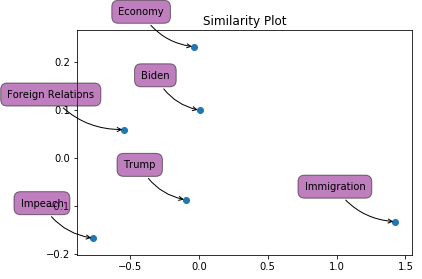

In [43]:
import matplotlib.pyplot as plt

# Calculating the similarity matrix which is the input for plotting MDS plot
similarity_matrix = lift1
np.fill_diagonal(similarity_matrix.values, 0)


# Plotting MDS plot
from sklearn import manifold
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(similarity_matrix)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(lift1, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-30, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.65', fc = 'purple', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.25'))

plt.title('Similarity Plot')
plt.show()

### Part E

In [27]:
## get top ten cities of each state
Michigan = ['Detroit','Grand Rapids','Warren', 'Sterling Heights','Ann Arbor','Lansing','Flint','Dearborn','Livonia','Troy']
Pennsylvania = ['Philadelphia','Pittsburgh','Allentown','Erie','Reading','Upper Darby','Scranton','Bethlehem','Lancaster','Millcreek']
Wisconsin = ['Milwaukee','Madison','Green Bay','Kenosha','Racine','Appleton','Waukesha','Eau Claire','Oshkosh','Janesville']

In [28]:
## make the city name all lower case
mi = []
for x in Michigan:
    mi.append(x.lower())
    
pen = []
for x in Pennsylvania:
    pen.append(x.lower())
    
wi = []
for x in Wisconsin:
    wi.append(x.lower())

In [29]:
threestates = []
for x in tweets['User Location'].unique():
    if 'michigan' in str(x).lower() or 'pennsylvania'in str(x).lower() or 'wisconsin' in str(x).lower() or str(x).lower().endswith(', mi') or str(x).lower().endswith('pa') or str(x).lower().endswith('wi') or str(x).lower() in mi or str(x).lower() in pen or str(x).lower() in wi:
        threestates.append(x)

threestates

['Michigan, USA',
 'Pennsylvania',
 'Green Bay',
 'Pennsylvania, USA',
 'Verona WI',
 'Altoona PA',
 'Wisconsin, USA',
 'Lehigh Valley PA',
 'DELCO Phila, Pa',
 'Philadelphia, PA',
 'Eastern PA',
 'Warren, PA',
 'Butler, PA',
 'Philadelphia',
 'Somewhere in Pennsylvania!',
 'Little Chute, WI',
 'Easton, PA',
 'Holt, MI',
 'Grand Blanc, MI',
 'Pittsburgh, PA',
 'Tempe, AZ & Door County, WI',
 'Waterford, PA',
 'Lebanon, PA',
 'Monaca, PA',
 'Wisconsin, USA ',
 'Loganville, PA',
 'Michigan U.S.A.',
 'Near Pittsburgh PA',
 'Western Pa',
 'Detroit, MI',
 'Huntingdon Valley, PA',
 'Oakland County, Mi',
 'Cranberry Township, PA',
 'Hobart, WI',
 'Lancaster, PA',
 'Clinton, MI',
 'Southfield, MI',
 'Michigan',
 'Lock Haven, PA',
 'Ligonier, PA',
 'Davidsville, PA',
 'New York / Pennsylvania',
 'Mt. Pleasant Michigan',
 'Milwaukee',
 'Superior, WI',
 'Port Huron, MI',
 'PA']

In [30]:
for index, row in tweets.iterrows():
    if row['User Location'] in threestates:
        tweets.loc[index,'User Location'] = 'battleground'

In [31]:
data1 = tweets.copy()
data1[data1['User Location'] == 'battleground']

,Unnamed: 0,Date,tweets,User Location,hashtag,clean_tweets,word_freq_list,comments_attributes_replace
13,13,10/14/2019 0:35,@NBCNews Unfounded? You people are nuts! Oh ...,battleground,#MAGA2020,nbcnews unfounded you people are nuts oh wai...,"[unfounded, wait, nbcnews, never, maga2020, yo...",unfounded wait nbcnews never maga2020 youre oh...
32,32,10/14/2019 0:24,@BillKristol Drunk again? #MAGA2020,battleground,#MAGA2020,billkristol drunk again maga2020,"[billkristol, maga2020, drunk]",billkristol maga2020 drunk
54,54,10/14/2019 0:04,@DavidJHarrisJr @realDonaldTrump That would of...,battleground,#MAGA2020,davidjharrisjr realdonaldtrump that would of m...,"[realdonaldtrump, week, maga, even, made, davi...",realtrump week maga even made davidjharrisjr w...
155,155,10/13/2019 22:45,No matter how hard they try to hinder our abil...,battleground,#MAGA2020,no matter how hard they try to hinder our abil...,"[matter, train, httpstcoyzum2k89u3, stay, stro...",matter train httpstcoyzum2k89u3 stay strong… t...
164,164,10/13/2019 22:38,@thehill @realDonaldTrump You don’t speak for ...,battleground,#MAGA2020,thehill realdonaldtrump you don’t speak for th...,"[realdonaldtrump, deranged, thehill, maga2020,...",realtrump deranged thehill maga2020 magats tru...
179,179,10/13/2019 22:26,@MargaretheBrac2 If you listen to the Presiden...,battleground,#MAGA2020,margarethebrac2 if you listen to the president...,"[listen, margarethebrac2, speech, every, take…...",listen margarethebrac2 speech every take… pres...
203,203,10/13/2019 22:15,#tcot #ccot #LNYHBT #maga2020 #ycot Do you thi...,battleground,#MAGA2020,tcot ccot lnyhbt maga2020 ycot do you think th...,"[lnyhbt, dem, operative, maga2020, media, loon...",lnyhbt dem operative maga2020 media looneyleft...
212,212,10/13/2019 22:06,#tcot #ccot #LNYHBT #maga2020 #ycot @TexGOP I...,battleground,#MAGA2020,tcot ccot lnyhbt maga2020 ycot texgop it is i...,"[looneyleft, ridiculously, httpstco7fzqvgoyze,...",looneyleft ridiculously httpstco7fzqvgoyze yco...
214,214,10/13/2019 22:05,@DavidJHarrisJr @realDonaldTrump Nice photo bo...,battleground,#MAGA2020,davidjharrisjr realdonaldtrump nice photo bomb...,"[realdonaldtrump, davidjharrisjr, maga2020, ph...",realtrump davidjharrisjr maga2020 photo bomb nice
245,245,10/13/2019 21:42,Um? 🤔 How many average voters want our troops ...,battleground,#MAGA2020,um 🤔 how many average voters want our troops i...,"[realdonaldtrump, troops, answer, thank, c…, a...",realtrump troops answer thank c… average forei...


In [32]:
data1 = data1.dropna().copy()
data1['tweets_battle'] = data1['User Location']+ data1['clean_tweets']
# data1.loc[data1['User Location'] == 'battleground','tweets_battle'] = data1[]+ data1['tweets']
data1

,Unnamed: 0,Date,tweets,User Location,hashtag,clean_tweets,word_freq_list,comments_attributes_replace,tweets_battle
0,0,10/14/2019 0:47,Why do they keep electing elites that have mil...,United States,#MAGA2020,why do they keep electing elites that have mil...,"[elites, httpstcoxksbijvqcn, maga2020…, keep, ...",elites httpstcoxksbijvqcn maga2020… keep elect...,United Stateswhy do they keep electing elites ...
1,1,10/14/2019 0:46,No Shame! \r\nThanks @carlosrossimc for the ve...,United States,#MAGA2020,no shame \r\nthanks carlosrossimc for the vers...,"[kagchallenge, verse, httpstcoj847bf4s3n, sham...",kagchallenge verse httpstcoj847bf4s3n shame ca...,United Statesno shame \r\nthanks carlosrossimc...
3,3,10/14/2019 0:45,@realDonaldTrump @FoxNews needs to dump Wallac...,"Boston, MA",#MAGA2020,realdonaldtrump foxnews needs to dump wallace ...,"[wallace, switch, realdonaldtrump, shep👉🏻🚪, ev...",immigrationace switch realtrump shep👉🏻🚪 every ...,"Boston, MArealdonaldtrump foxnews needs to dum..."
4,4,10/14/2019 0:45,President Trump is 100% Correct on Syria Withd...,Florida of course!,#MAGA2020,president trump is 100 correct on syria withdr...,"[stable, president, httpstcokap1sw2bhg, why…, ...",stable president httpstcokap1sw2bhg why… – ’ l...,Florida of course!president trump is 100 corre...
5,5,10/14/2019 0:44,@JoeBiden Poor Joe...#MAGA #MAGA2020,Corpus Christi,#MAGA2020,joebiden poor joemaga maga2020,"[maga2020, poor, joemaga, joebiden]",maga2020 poor bidenmaga biden,Corpus Christijoebiden poor joemaga maga2020
6,6,10/14/2019 0:44,Found a useful idiot from the left who interru...,"Whereabouts, U.S.A.",#MAGA2020,found a useful idiot from the left who interru...,"[trumpminneapolisrally, kag2020, useful, maga,...",trumpminneapolisrally kag2020 useful maga inte...,"Whereabouts, U.S.A.found a useful idiot from t..."
7,7,10/14/2019 0:41,ICYMI Fort Worth police kill woman inside her ...,USA,#MAGA2020,icymi fort worth police kill woman inside her ...,"[woman, icymi, httpstco5j7fmy4q2j, election202...",woman icymi httpstco5j7fmy4q2j election2020 wo...,USAicymi fort worth police kill woman inside h...
8,8,10/14/2019 0:41,@EricTrump @LaraLeaTrump Wishing you happy bir...,"Columbia, Maryland USA",#MAGA2020,erictrump laraleatrump wishing you happy birth...,"[maga2020, happy, wishing, laraleatrump, erict...",maga2020 happy wishing laraleatrump erictrump ...,"Columbia, Maryland USAerictrump laraleatrump w..."
10,10,10/14/2019 0:40,In case I haven't said it this week.\r\n#Winni...,North America - East & West,#MAGA2020,in case i havent said it this week\r\nwinning ...,"[🇺🇸⚖️✌️🏼😉, week, case, winning, good, maga2020...",🇺🇸⚖️✌️🏼😉 week case winning good maga2020 haven...,North America - East & Westin case i havent sa...
11,11,10/14/2019 0:37,.@realDonaldTrump is the FOUNDER OF ISIS\r\n\r...,Vegas,#MAGA2020,realdonaldtrump is the founder of isis\r\n\r\n...,"[realdonaldtrump, httpstcoizlfu3jlao, maga, wi...",realtrump httpstcoizlfu3jlao maga winning maga...,Vegasrealdonaldtrump is the founder of isis\r\...


In [33]:
people_trump = ['trump','battleground']
trump_df = pd.DataFrame(columns = people_trump)

def candidates_mentioned(item):
    if p.lower() in item.lower():
        return 1
    else:
        return 0
      
for p in people_trump:
    trump_df[p] = data1['tweets_battle'].apply(candidates_mentioned)
    
    
    
people_dem = ['biden','battleground']
dem_df = pd.DataFrame(columns = people_dem)

def candidates_mentioned(item):
    if p.lower() in item.lower():
        return 1
    else:
        return 0
      
for p in people_dem:
    dem_df[p] = data1['tweets_battle'].apply(candidates_mentioned)

In [34]:
liftratio1=pd.DataFrame(columns = people_trump)
for i in range(len(people_trump)):
    new_list = []
    for j in range(len(people_trump)):
        if (i!=j):
            numerator = ((trump_df[people_trump[i]] + trump_df[people_trump[j]]) > 1).sum()
            denominator = trump_df[people_trump[j]].sum()*trump_df[people_trump[i]].sum()
            lift = numerator*len(trump_df)/denominator
            liftratio1.loc[people_trump[i],people_trump[j]] = lift
print ('Below are the lift ratios among Trump and battleground')
liftratio1

Below are the lift ratios among Trump and battleground


,trump,battleground
trump,NaN,1.07154
battleground,1.07154,NaN


In [35]:
liftratio2=pd.DataFrame(columns = people_dem)
for i in range(len(people_dem)):
    new_list = []
    for j in range(len(people_dem)):
        if (i!=j):
            numerator = ((dem_df[people_dem[i]] + dem_df[people_dem[j]]) > 1).sum()
            denominator = dem_df[people_dem[j]].sum()*dem_df[people_dem[i]].sum()
            lift = numerator*len(dem_df)/denominator
            liftratio2.loc[people_dem[i],people_dem[j]] = lift
print ('Below are the lift ratios among Biden and battleground')
liftratio2

Below are the lift ratios among Biden and battleground


,biden,battleground
biden,NaN,1.886
battleground,1.886,NaN


### It surprised us the lift ratios are so high for both candidates in battlegrounds, however, we re-calculate the lift ratio by hand and it gave us the exact same number, so maybe that's what it is in the 6k tweets we collected.

## Lift analysis

In [36]:
liftdf = pd.DataFrame(index=['Battleground'],columns=['Trump','Biden'])
liftdf.iloc[0,0]=liftratio1.iloc[0,1]
liftdf.iloc[0,1]=liftratio2.iloc[0,1]
liftdf

,Trump,Biden
Battleground,1.07154,1.886


In [37]:
data2 = data1[data1['User Location'] == 'battleground']

In [38]:
#get the compound sentiment score of tweets mentioned Trump
trumpsenti=[]
analyzer = SIA()
for index, row in data2.iterrows():
    if 'trump' in row['clean_tweets'].lower():
        vs = analyzer.polarity_scores(row['clean_tweets'])
        trumpsenti.append(vs['compound'])

In [39]:
#get the compound sentiment score of tweets mentioned Biden
demsenti=[]
analyzer = SIA()
for index, row in data2.iterrows():
    if 'biden' in row['clean_tweets'].lower():
        vs = analyzer.polarity_scores(row['clean_tweets'])
        demsenti.append((vs['compound']))

In [40]:
# take the average semtiment score of each tweet
import numpy as np
sentimentdf = pd.DataFrame(index=['Battleground'],columns=['Trump','Biden'])
sentimentdf.iloc[0,0]=np.mean(trumpsenti)
sentimentdf.iloc[0,1]=np.mean(demsenti)
sentimentdf

,Trump,Biden
Battleground,0.161143,0.0365636


In [41]:
# a more detailed report of people's sentiment when they talk about Trump
trumppos = 0
trumpneg = 0
for x in trumpsenti:
    if x>0:
        trumppos+=1
    if x<0:
        trumpneg+=1
trumppos = trumppos/len(trumpsenti)
trumpneg = trumpneg/len(trumpsenti)


print(str(trumppos*100) +"% of tweets have postive sentiments regarding to Trump in battleground.")
print(str((1-trumpneg-trumppos)*100) +"% of tweets have neutral sentiments regarding to Trump in battleground.")
print(str(trumpneg*100) +"% of tweets have negitive sentiments regarding to Trump in battleground.")

46.26865671641791% of tweets have postive sentiments regarding to Trump in battleground.
34.32835820895522% of tweets have neutral sentiments regarding to Trump in battleground.
19.402985074626866% of tweets have negitive sentiments regarding to Trump in battleground.


In [42]:
# a more detailed report of people's sentiment when they talk about Biden
bidenpos = 0
bidenneg = 0
for x in demsenti:
    if x>0:
        bidenpos+=1
    if x<0:
        bidenneg+=1
        
bidenpos = bidenpos/len(demsenti)
bidenpos = bidenneg/len(demsenti)


print(str(bidenpos*100) +"% of tweets have postive sentiments regarding to Biden in battleground.")
print(str((1-bidenpos-bidenpos)*100) +"% of tweets have neutral sentiments regarding to Biden in battleground.")
print(str(bidenpos*100) +"% of tweets have negitive sentiments regarding to Biden in battleground.")

27.27272727272727% of tweets have postive sentiments regarding to Biden in battleground.
45.45454545454546% of tweets have neutral sentiments regarding to Biden in battleground.
27.27272727272727% of tweets have negitive sentiments regarding to Biden in battleground.


# Part F

####     According to the lift analysis, Trump is associated more with immigration and impeach issues than Biden. While Biden is more associated with economy and foreign relations issues. According to the sentiment analysis, people have very diverse sentiments of Trump and Biden on different issues. As for the economy issue, people’s overall sentiment of Trump is positive. On the other hand, Biden is not favorable because the sentiment score is negative. For immigration issue, Biden is favorable, and Trump is not liked. As for foreign relations, both candidates are not favorable. However, people still prefer Trump compared to Biden. For impeach issue, Trump is more favorable than Biden. And people’s sentiment of Biden is neutral on impeach issue. 

####    The MDS plot conformed the lift ratio numbers we got in previous step as Trump is more similar/associated with the impeach issue than Biden is. On the other hand, Biden is more related to the economy issue and foreign relations issue. Biden also has a close relationship with foreign relations issues. The Immigration issue, without any surprises, is closely associated with Trump.

####    Trump should improve his reputation on immigration and foreign relation issues because on these issues Biden is favorable. He should also consider more about economic issues. Our recommendation is that he should not post too many tweets about his politics. Even if he wants to post something on Twitter, he should not show the aggressiveness because it may make people dislike him. Especially for immigration and foreign relation issues, on which people show negative sentiments. As for Biden, he should work on improving his recognition in solving economy and impeach issues, since Trump is preferred compared to him on these two issues. What’s more, he should increase the frequency of posting tweets. Because Trump posts a lot, and it will shift the focus away from him.  
####    According to the result of lift analysis Trump is not frequently discussed in Michigan, Pennsylvania, and Wisconsin. The probability of Trump been discussed is slightly more than random selection. Compared to Trump, Biden is much more likely to be discussed by people in Michigan, Pennsylvania, and Wisconsin. The probability of Biden being discussed is significantly higher than random selection. According to the result of sentiment analysis, for people in Michigan, Pennsylvania, and Wisconsin, their sentiments about Trump is more positive than their sentiments about Biden. In other words, Trump is more favorable in Michigan, Pennsylvania, and Wisconsin, compared to Biden. After combining the lift analysis and the sentiment analysis, we are confident to conclude that although Biden is mentioned more in people’s discussions, it is likely that those mentions are close to neutral sentiments. Although Trump is mentioned less frequently, people in Michigan, Pennsylvania and Wisconsin like him more than Biden. 
####    Trump should give more speeches in Michigan, Pennsylvania, and Wisconsin. Because he is favorable compared to Biden. By giving more speeches, people will discuss him more, and it is beneficial. The topics of the speeches should relate to addressing economic issues, which will make him more favorable. Biden should participate more on Twitter and speak for people’s benefits in order to have higher sentiment score than Trump.
